### This is a notebook for comparing predicted segmentation with ground truth segmentations

In [1]:
import numpy as np
from cellpose import utils, dynamics, metrics
from numba import jit
from scipy.optimize import linear_sum_assignment
from scipy.ndimage import convolve, mean
import glob

In [2]:
x = "tile_0002_0029_seg.npy"
print(x.split('_')[-2][2:])

29


In [7]:
!ls ../data/groundtruth_sample/

tile_0002_0025_seg.npy	tile_0002_0028_seg.npy	tile_0002_0031_seg.npy
tile_0002_0026_seg.npy	tile_0002_0029_seg.npy	tile_0002_0033_seg.npy
tile_0002_0027_seg.npy	tile_0002_0030_seg.npy


### Loading of *_seg.npy files which contains 

In [8]:
# Path to directory containing .npy files
groundtruth_files_path = "../data/groundtruth_sample/"
predicted_files_path = "../data/groundtruth_sample/"

# Get list of all .npy files in the directory and sort them in numerical order
groundtruth_files = sorted(glob.glob(f"{groundtruth_files_path}/*.npy"), key=lambda x: int(x.split('_')[-2][2:]))
predicted_files = sorted(glob.glob(f"{predicted_files_path}/*.npy"), key=lambda x: int(x.split('_')[-2][2:]))

# Load each .npy file into a list and extract only the 'masks' field
groundtruth_list = [np.load(file, allow_pickle=True).item()['masks'] for file in groundtruth_files]
predicted_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_files]

print("Number of .npy files loaded:", len(groundtruth_list))

# Accessing the 'masks' directly from the lists
masks_true = groundtruth_list
masks_pred = predicted_list

print(groundtruth_files)
print(predicted_files)

Number of .npy files loaded: 8
['../data/groundtruth_sample/tile_0002_0025_seg.npy', '../data/groundtruth_sample/tile_0002_0026_seg.npy', '../data/groundtruth_sample/tile_0002_0027_seg.npy', '../data/groundtruth_sample/tile_0002_0028_seg.npy', '../data/groundtruth_sample/tile_0002_0029_seg.npy', '../data/groundtruth_sample/tile_0002_0030_seg.npy', '../data/groundtruth_sample/tile_0002_0031_seg.npy', '../data/groundtruth_sample/tile_0002_0033_seg.npy']
['../data/groundtruth_sample/tile_0002_0025_seg.npy', '../data/groundtruth_sample/tile_0002_0026_seg.npy', '../data/groundtruth_sample/tile_0002_0027_seg.npy', '../data/groundtruth_sample/tile_0002_0028_seg.npy', '../data/groundtruth_sample/tile_0002_0029_seg.npy', '../data/groundtruth_sample/tile_0002_0030_seg.npy', '../data/groundtruth_sample/tile_0002_0031_seg.npy', '../data/groundtruth_sample/tile_0002_0033_seg.npy']


In [16]:
avr_precision = metrics.average_precision(masks_true, masks_pred)
#print("average precision:", avr_precision)

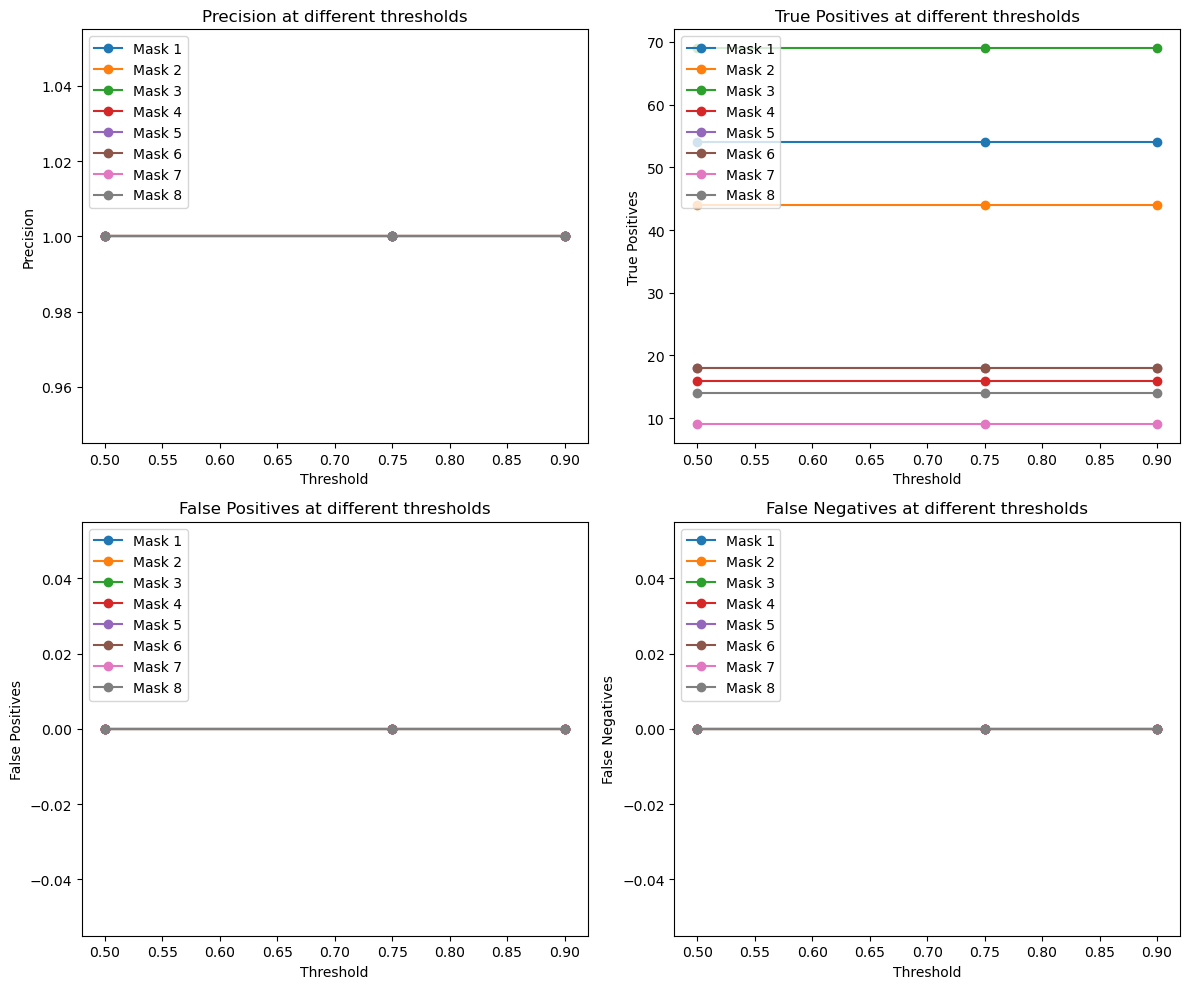

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import metrics

# Assuming you already have masks_true and masks_pred defined
# You can compute the average precision as follows:
avr_precision = metrics.average_precision(masks_true, masks_pred)

# Extract values from the output
precision = avr_precision[0]  # Precision at different thresholds
tp = avr_precision[1]         # True Positives at different thresholds
fp = avr_precision[2]         # False Positives at different thresholds
fn = avr_precision[3]         # False Negatives at different thresholds

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Precision at different thresholds
axs[0, 0].plot([0.5, 0.75, 0.9], precision.T, marker='o')
axs[0, 0].set_title('Precision at different thresholds')
axs[0, 0].set_xlabel('Threshold')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].legend([f'Mask {i+1}' for i in range(precision.shape[0])], loc='upper left')

# Plot 2: True Positives at different thresholds
axs[0, 1].plot([0.5, 0.75, 0.9], tp.T, marker='o')
axs[0, 1].set_title('True Positives at different thresholds')
axs[0, 1].set_xlabel('Threshold')
axs[0, 1].set_ylabel('True Positives')
axs[0, 1].legend([f'Mask {i+1}' for i in range(tp.shape[0])], loc='upper left')

# Plot 3: False Positives at different thresholds
axs[1, 0].plot([0.5, 0.75, 0.9], fp.T, marker='o')
axs[1, 0].set_title('False Positives at different thresholds')
axs[1, 0].set_xlabel('Threshold')
axs[1, 0].set_ylabel('False Positives')
axs[1, 0].legend([f'Mask {i+1}' for i in range(fp.shape[0])], loc='upper left')

# Plot 4: False Negatives at different thresholds
axs[1, 1].plot([0.5, 0.75, 0.9], fn.T, marker='o')
axs[1, 1].set_title('False Negatives at different thresholds')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('False Negatives')
axs[1, 1].legend([f'Mask {i+1}' for i in range(fn.shape[0])], loc='upper left')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
